# Final Project

In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be `price` column. **Do not forget, this is a Classification problem!**

## Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

## Steps
- Read the `diamonds.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification). *Hint: Is there any imbalanced problem in the label column?*
- Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>

# Data

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split

In [95]:
# Read csv
diamonds_data = pd.read_csv('diamonds.csv')
diamonds_data

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [34]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [35]:
diamonds_data.groupby(by="cut").count()

,index,carat,color,clarity,depth,table,x,y,z,price
cut,,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [36]:
diamonds_data.groupby(by="color").count()

,index,carat,cut,clarity,depth,table,x,y,z,price
color,,,,,,,,,,
D,6775,6775,6775,6775,6775,6775,6775,6775,6775,6775
E,9797,9797,9797,9797,9797,9797,9797,9797,9797,9797
F,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542
G,11292,11292,11292,11292,11292,11292,11292,11292,11292,11292
H,8304,8304,8304,8304,8304,8304,8304,8304,8304,8304
I,5422,5422,5422,5422,5422,5422,5422,5422,5422,5422
J,2808,2808,2808,2808,2808,2808,2808,2808,2808,2808


In [37]:
diamonds_data.groupby(by="clarity").count()

,index,carat,cut,color,depth,table,x,y,z,price
clarity,,,,,,,,,,
I1,741,741,741,741,741,741,741,741,741,741
IF,1790,1790,1790,1790,1790,1790,1790,1790,1790,1790
SI1,13065,13065,13065,13065,13065,13065,13065,13065,13065,13065
SI2,9194,9194,9194,9194,9194,9194,9194,9194,9194,9194
VS1,8171,8171,8171,8171,8171,8171,8171,8171,8171,8171
VS2,12258,12258,12258,12258,12258,12258,12258,12258,12258,12258
VVS1,3655,3655,3655,3655,3655,3655,3655,3655,3655,3655
VVS2,5066,5066,5066,5066,5066,5066,5066,5066,5066,5066


# Exploratory Data Analysis

(array([34663.,     0., 11271.,     0.,     0.,  4109.,     0.,  2308.,
            0.,  1589.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

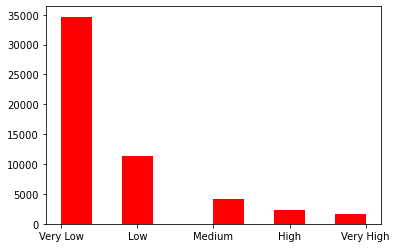

In [21]:
# Our label Distribution (countplot)
import matplotlib.pyplot as plt
plt.hist(diamonds_data.price, color = "red")

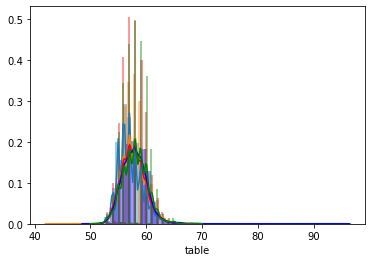

In [44]:
# Example EDA (distplot)
sns.distplot(diamonds_data[diamonds_data.price == "Very Low"].table)
sns.distplot(diamonds_data[diamonds_data.price == "Low"].table)
sns.distplot(diamonds_data[diamonds_data.price == "Medium"].table,color="r")
sns.distplot(diamonds_data[diamonds_data.price == "High"].table,color="b")
sns.distplot(diamonds_data[diamonds_data.price == "Very High"].table,color="g")

In [22]:
# Import necessary libraries
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split dataset into train and test sets. (0.7/0.3)

In [24]:
#Are there any duplicated values? No
print(diamonds_data.duplicated().sum())

0


In [ ]:
#Do we need to do feature scaling? The interval of features are different so the scaling cannot be okay.


In [96]:
#Do we need to generate new features? Yes we should change some verbal values with numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diamonds_data["Label_price"] = label_encoder.fit_transform(diamonds_data["price"])
diamonds_data.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,Label_price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,4
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,4
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,4
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,4
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,4


In [97]:
#for simplicity verbal things should be removed.
diamonds_data.drop(["index","cut","color","clarity","price"], axis=1, inplace=True)
diamonds_data.head()

,carat,depth,table,x,y,z,Label_price
0,0.23,61.5,55.0,3.95,3.98,2.43,4
1,0.21,59.8,61.0,3.89,3.84,2.31,4
2,0.23,56.9,65.0,4.05,4.07,2.31,4
3,0.29,62.4,58.0,4.20,4.23,2.63,4
4,0.31,63.3,58.0,4.34,4.35,2.75,4


In [98]:
#Split dataset into train and test sets. (0.7/0.3)
X, y = diamonds_data.iloc[: , :-1], diamonds_data.iloc[: , -1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


0        4
1        4
2        4
3        4
4        4
        ..
53935    4
53936    4
53937    4
53938    4
53939    4
Name: Label_price, Length: 53940, dtype: int32

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [99]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9982255416070767
Accuracy of test: 0.8004572982326041


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.